In [ ]:
import h5py    
import numpy as np 
import matplotlib.pyplot as plt
from pyjet import cluster,DTYPE_PTEPM
import pandas as pd

In [ ]:
f = pd.read_hdf("events_LHCO2020_backgroundMC_Pythia.h5") #events_anomalydetection.h5

In [ ]:
events_combined = f.T

In [ ]:
#np.shape(events_combined)
len(events_combined.T)

In [25]:
#Now, let's cluster some jets!
leadpT = {}
alljets = {}
for mytype in ['background','signal']:
    leadpT[mytype]=[]
    alljets[mytype]=[]
    for i in range(1000): #len(events_combined)):
        #print(i)
        if (i%10000==0):
            print(mytype,i)
            pass
        issignal = events_combined.at[i,2101]
        print(issignal)
        if (mytype=='background' and issignal):
            continue
        elif (mytype=='signal' and issignal==0):
             continue
        pseudojets_input = np.zeros(len([x for x in events_combined[i][::3] if x > 0]), dtype=DTYPE_PTEPM)
        for j in range(700):
            if (events_combined[i][j*3]>0):
                pseudojets_input[j]['pT'] = events_combined.at[i,j*3]
                pseudojets_input[j]['eta'] = events_combined.at[i,j*3+1]
                pseudojets_input[j]['phi'] = events_combined.at[i,j*3+2]
                pass
            pass
        sequence = cluster(pseudojets_input, R=1.0, p=-1)
        jets = sequence.inclusive_jets(ptmin=20)
        #print(len(jets))
        #print(jets[0] if len(jets)!=0 else continue)
        if len(jets)!=0:
            leadpT[mytype] += [jets[0].pt]
            alljets[mytype] += [jets]
        pass

background 0
0.2771412134170532
-1.0658172369003296
0.8971000909805298
0.6475895643234253
-0.7189674377441406
2.3249526023864746
0.9894781112670898
-1.8798470497131348
3.101775884628296
1.0240284204483032
-1.3561662435531616
0.6407128572463989
2.2873740196228027
-1.2628687620162964
0.5202292799949646
4.194765090942383
-1.2584723234176636
0.44701117277145386
5.6385650634765625
-1.2299031019210815
0.3541510999202728
10.567697525024414
-1.288917899131775
0.6023932695388794
21.79006576538086
-1.2278412580490112
0.4905148148536682
1.4328422546386719
-1.263488531112671
0.27210333943367004
10.180005073547363
-1.232944369316101
0.6369880437850952
1.042758584022522
-1.1572402715682983
3.1375184059143066
5.509432315826416
-1.162984013557434
0.46565020084381104
0.8759369254112244
-0.7102199792861938
-0.047978535294532776
6.300930500030518
-0.7236112356185913
0.1904137134552002
10.6724853515625
-0.5545706748962402
0.06908781826496124
40.15950393676758
-0.5246622562408447
0.05388321727514267
0.7688

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
signal 0
0.2771412134170532
-1.0658172369003296
0.8971000909805298
0.6475895643234253
-0.7189674377441406
2.3249526023864746
0.9894781112670898
-1.8798470497131348
3.101775884628296
1.0240284204483032
-1.3561662435531616
0.6407128572463989
2.2873740196228027
-1.2628687620162964
0.5202292799949646
4.194765090942383
-1.2584723234176636
0.44701117277145386
5.6385650634765625
-1.2299031019210815
0.3541510999202728
10.567697525024414
-1.288917899131775
0.6023932695388794
21.79006576538086
-1.2278412580490112
0.4905148148536682
1.4328422546386719
-1.263488531112671
0.27210333943367004
10.180005073547363
-1.232944369316101
0.6369880437850952
1.042758584022522
-1.1572402715682983
3.1375184059143066
5.509432315826416
-1.162984013557434
0.46565020084381104
0.8759369254112244
-0.7102199792861938
-0.0

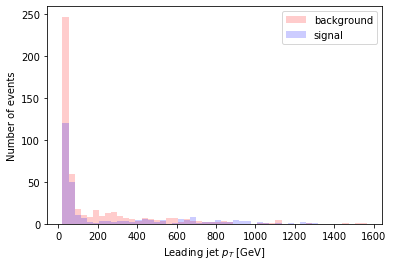

<Figure size 432x288 with 0 Axes>

In [26]:
#Let's make some very simple plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadpT['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadpT['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
plt.savefig("leadjetpt.pdf")

In [27]:
mjj={}
for mytype in ['background','signal']:
    mjj[mytype]=[]
    for k in range(len(alljets[mytype])):
        E = alljets[mytype][k][0].e+alljets[mytype][k][1].e
        px = alljets[mytype][k][0].px+alljets[mytype][k][1].px
        py = alljets[mytype][k][0].py+alljets[mytype][k][1].py
        pz = alljets[mytype][k][0].pz+alljets[mytype][k][1].pz
        mjj[mytype]+=[(E**2-px**2-py**2-pz**2)**0.5]
        pass
    pass

IndexError: list index out of range

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
plt.savefig("mjj.pdf")